In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [18]:
burglaries = gpd.read_file('../data/burg_agg.geojson')

In [19]:
burglaries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   TRACTCE                      809 non-null    object  
 1   count_of_burglaries          809 non-null    int64   
 2   STATEFP                      809 non-null    object  
 3   COUNTYFP                     809 non-null    object  
 4   GEOID                        809 non-null    object  
 5   NAME                         809 non-null    object  
 6   NAMELSAD                     809 non-null    object  
 7   MTFCC                        809 non-null    object  
 8   FUNCSTAT                     809 non-null    object  
 9   ALAND                        809 non-null    int64   
 10  AWATER                       809 non-null    int64   
 11  INTPTLAT                     809 non-null    object  
 12  INTPTLON                     809 non-null    object  
 1

In [24]:
burglaries = burglaries.drop_duplicates(subset = 'TRACTCE')

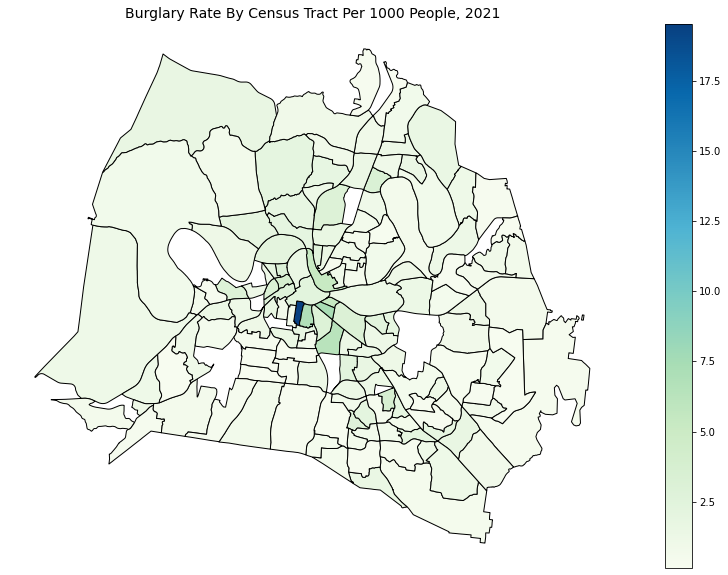

In [25]:
fig, ax = plt.subplots(figsize=(17,10))
burglaries.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);

In [28]:
zoom = burglaries[burglaries['burglaries_per_1000'] > 5]

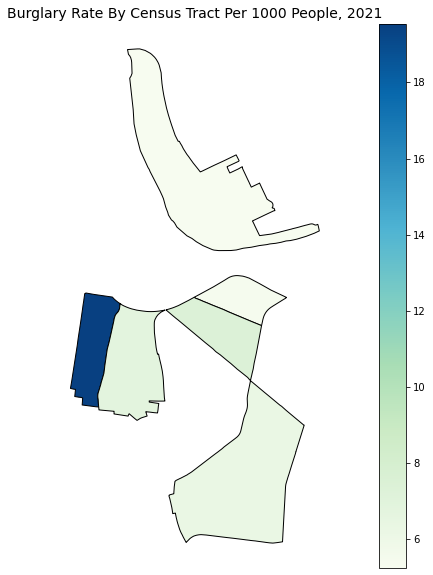

In [29]:
fig, ax = plt.subplots(figsize=(17,10))
zoom.plot(column = 'burglaries_per_1000',
               cmap = 'GnBu', 
               edgecolor = 'black',
               legend = True, 
               ax = ax)
ax.axis('off')
plt.title('Burglary Rate By Census Tract Per 1000 People, 2021', fontsize = 14);

In [34]:
max_burglaries = zoom[zoom['burglaries_per_1000'] == zoom['burglaries_per_1000'].max()]

In [46]:
center = max_burglaries.geometry.centroid
area_center = [center.y, center.x]
#area_center = [max_burglaries['latitude'], max_burglaries['longitude']]

C:\Users\sarei\AppData\Local\Temp/ipykernel_1300/2837820436.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = max_burglaries.geometry.centroid


In [48]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(max_burglaries).add_to(map_tract_16300)

map_tract_16300

In [49]:
map_tract_16300 = folium.Map(location =  area_center, zoom_start = 12)
folium.GeoJson(zoom).add_to(map_tract_16300)

map_tract_16300